In [1]:
%matplotlib notebook
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def getAverage(path):
    paths = os.listdir(path)
    tmp = []
    for pt in paths:
        if 'task01' in pt:
            tmp.append(pt)
    tmp2 = sitk.ReadImage(os.path.join(path, tmp[0]))
    for i in range(1, len(tmp)):
        tmp2 += sitk.ReadImage(os.path.join(path, tmp[i]))
    return sitk.GetArrayFromImage(tmp2)

<IPython.core.display.Javascript object>


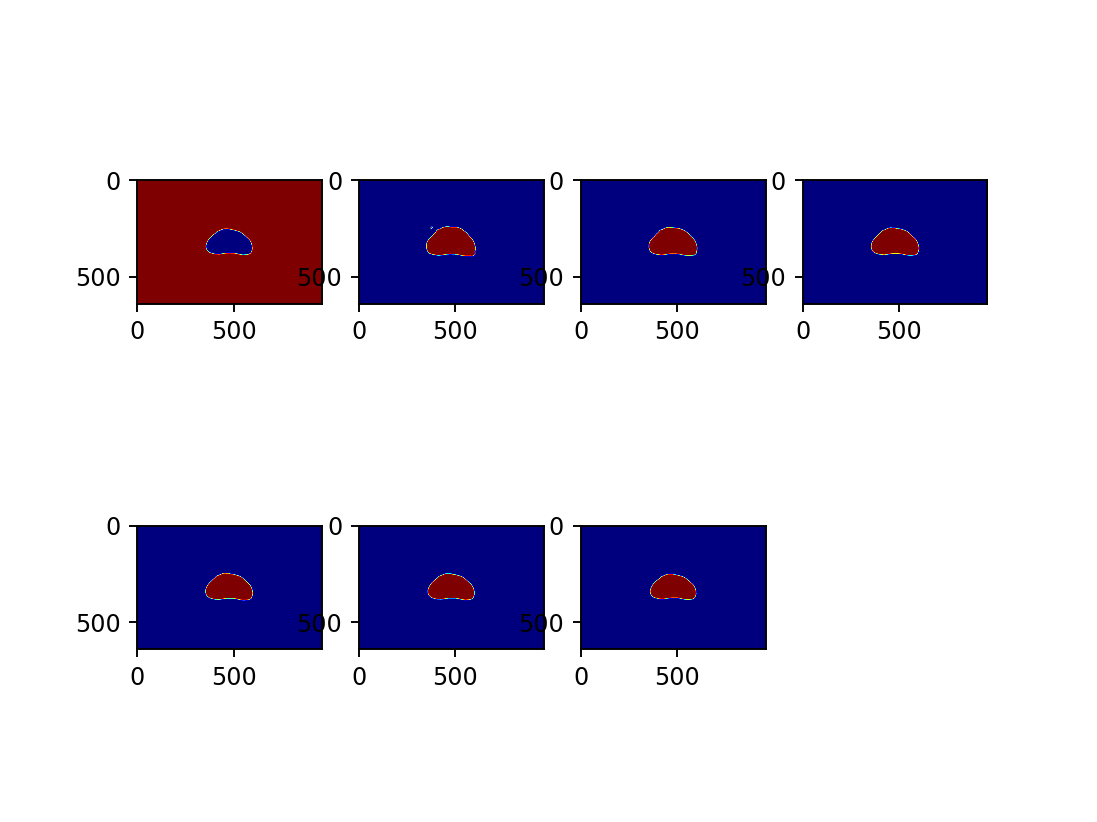

In [3]:
data = np.load('/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_Prediction_Results/Task106_PR1/case51.npz')
ground_truth = getAverage('Data/validation_data_v2/prostate/Validation/case51')
plt.figure()
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.imshow(np.array(data['softmax'][i,:,:]>0.5, dtype=np.float32), cmap='jet')
plt.show()

<IPython.core.display.Javascript object>


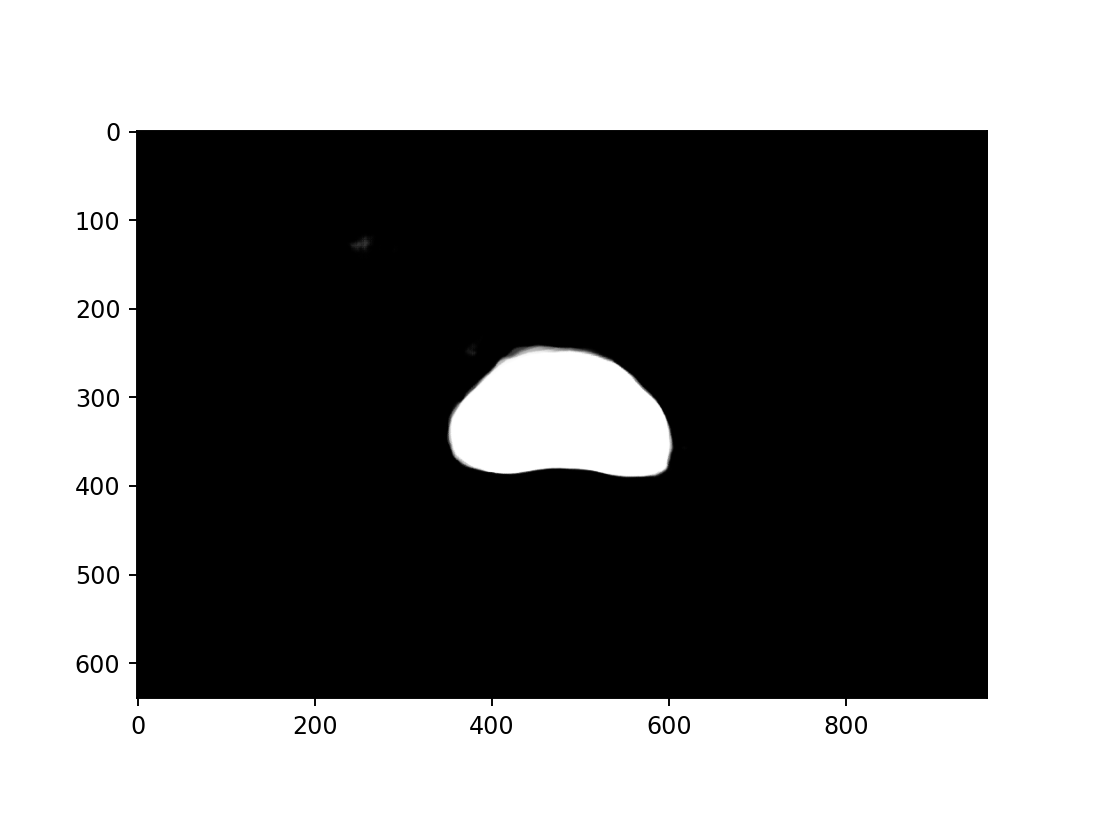

In [4]:
plt.figure()
plt.imshow(np.array(data['softmax'][2,:,:], dtype=np.float32), cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


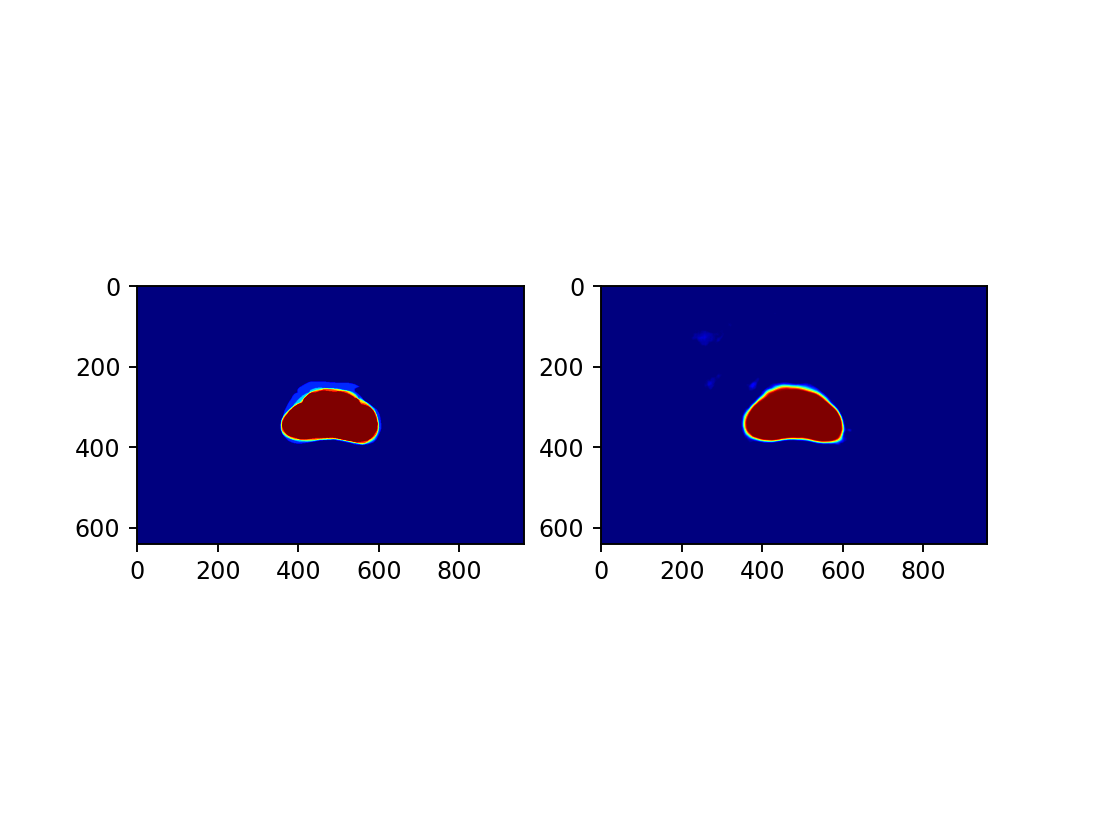

In [5]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(ground_truth[0,:,:], cmap='jet')
plt.subplot(1,2,2)
plt.imshow((np.array(data['softmax'][1:,:,:], dtype=np.float32)).sum(axis=0), cmap='jet')
plt.show()

In [6]:
def dice(result, reference):
    result = np.atleast_1d(result.astype(np.bool))
    reference = np.atleast_1d(reference.astype(np.bool))
    intersection = np.count_nonzero(result & reference)
    size_i1 = np.count_nonzero(result)
    size_i2 = np.count_nonzero(reference)

    try:
        dc = 2. * intersection / float(size_i1 + size_i2)
    except ZeroDivisionError:
        dc = 0.0
    return dc

def total_dice(ground_truth, predicted):
    prob_threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    tmp = 0
    for idx, th in enumerate(prob_threshold):
        predicted_thr = (predicted > th).astype(np.uint8)
        ground_truth_thr = (ground_truth > idx).astype(np.uint8)
        tmp += dice(predicted_thr, ground_truth_thr)
    return tmp/9.0

In [23]:
cases = os.listdir('/home/mzukovec/Documents/Faks/Semester 3/AMS/Data/validation_data_v2/prostate/Validation')
ground_truths = []
predictions = []

for case in cases:
    ground_truths.append(getAverage('Data/validation_data_v2/prostate/Validation/' + case))
    data = np.load('/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_Prediction_Results/Task106_PR1/'+case+'.npz')
    predictions.append((np.array(data['softmax'][1:,:,:], dtype=np.float32)>0.9995).sum(axis=0))

<IPython.core.display.Javascript object>


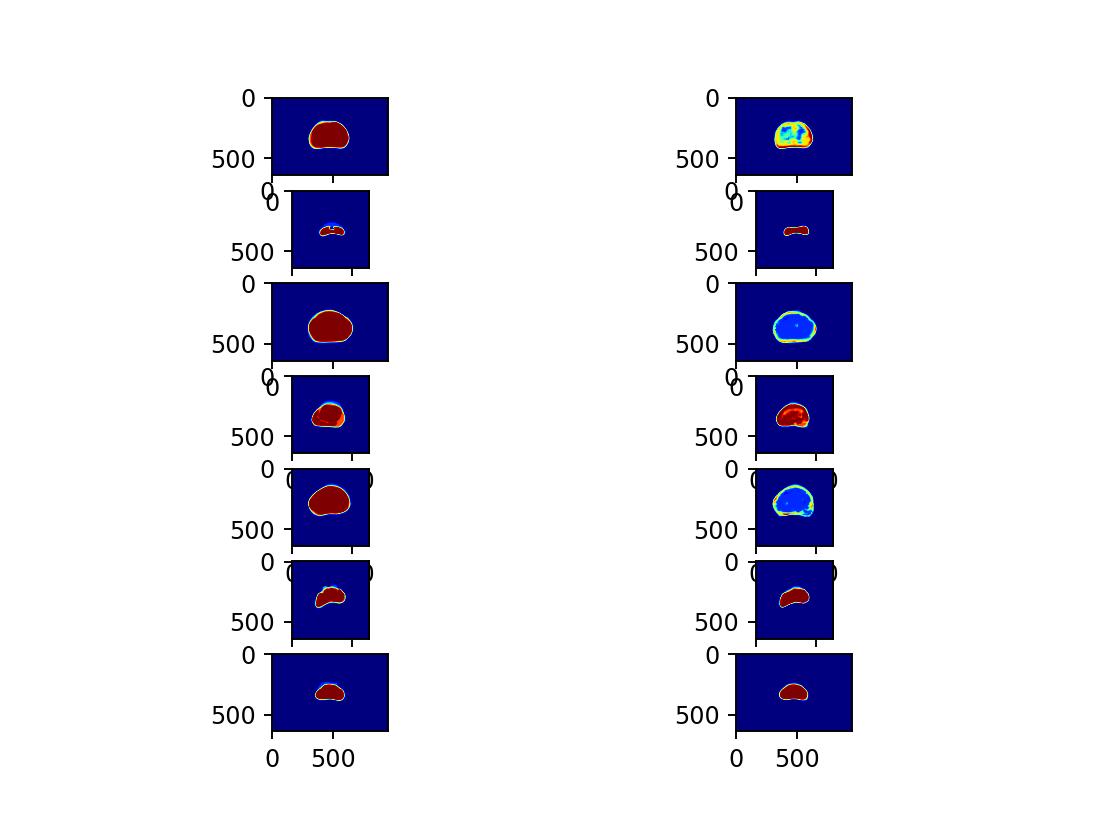

In [24]:
dice_score = []
for i in range(len(ground_truths)):
    dice_score.append(total_dice(ground_truths[i], predictions[i]))

idx = 1
plt.figure()
for i in range(len(ground_truths)):
    plt.subplot(len(ground_truths), 2, idx)
    idx += 1
    plt.imshow(np.array(ground_truths[i][0,:,:], dtype=np.float32), cmap='jet')
    plt.subplot(len(ground_truths), 2, idx)
    idx += 1
    plt.imshow(np.array(predictions[i], dtype=np.float32), cmap='jet')
plt.show()

In [25]:
print('Dice for validation images: ', np.mean(dice_score))

Dice for validation images:  0.6188026369349758


In [26]:
dice_score

[0.641591137982883,
 0.5697080851880909,
 0.6433796721267961,
 0.6138319603215844,
 0.6203646335488933,
 0.6202521635748833,
 0.6224908058017]

In [11]:
def dice(result, reference):
    result = np.atleast_1d(result.astype(np.bool))
    reference = np.atleast_1d(reference.astype(np.bool))
    intersection = np.count_nonzero(result & reference)
    size_i1 = np.count_nonzero(result)
    size_i2 = np.count_nonzero(reference)

    try:
        dc = 2. * intersection / float(size_i1 + size_i2)
    except ZeroDivisionError:
        dc = 0.0
    return dc

def total_dice2(ground_truth, predicted):
    prob_threshold = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
    tmp = []
    for idx, th in enumerate(prob_threshold):
        predicted_thr = (predicted[idx+1, :, :] > th).astype(np.uint8)
        ground_truth_thr = (ground_truth > idx).astype(np.uint8)
        tmp.append(dice(predicted_thr, ground_truth_thr))
    return tmp

In [12]:
data = np.load('/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_Prediction_Results/Task106_PR1/case50.npz')
ground_truth = getAverage('Data/validation_data_v2/prostate/Validation/case50')[0,:,:]
predicted= (np.array(data['softmax'], dtype=np.float32))

total_dice2(ground_truth, predicted)

[0.8470247260211937,
 0.8935673395601085,
 0.8904384066682696,
 0.8881618084473528,
 0.8784547880761749,
 0.8813624927424037]

<IPython.core.display.Javascript object>


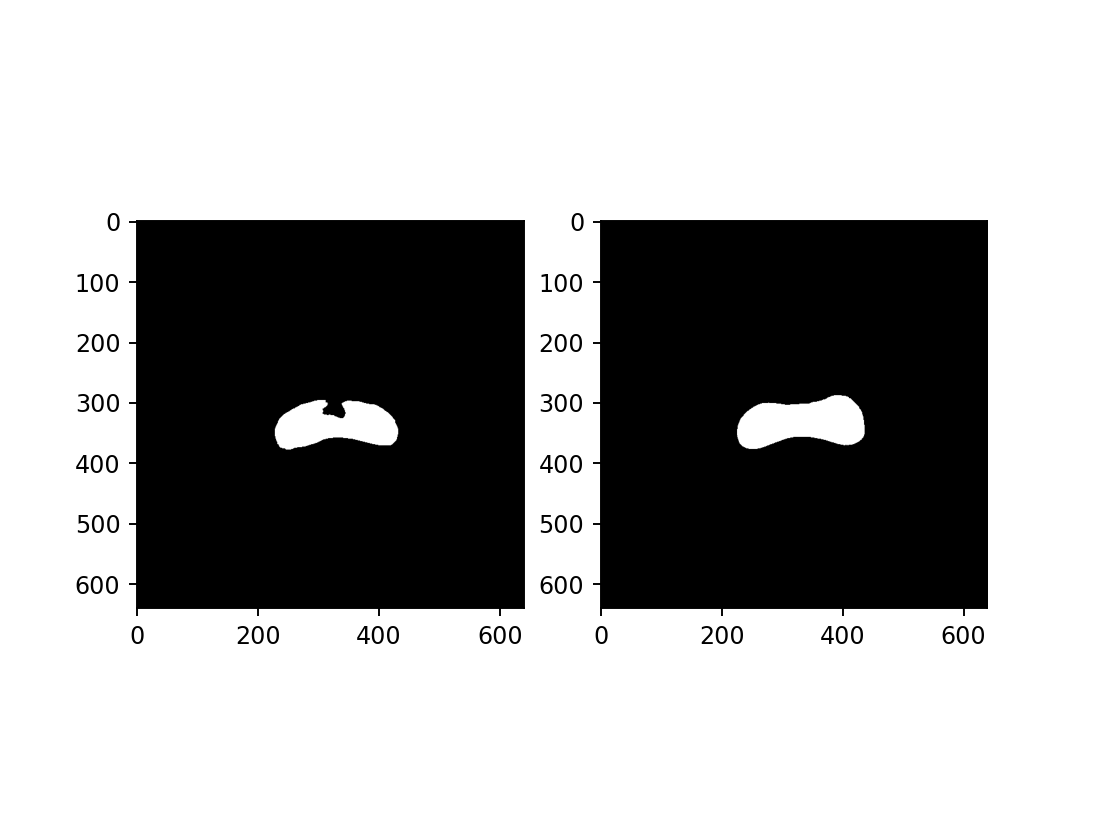

In [13]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(ground_truth>=3, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(predicted[3,:,:]>0.5, cmap='gray')
plt.show()

In [14]:
ground_truths[0].shape

(1, 640, 960)